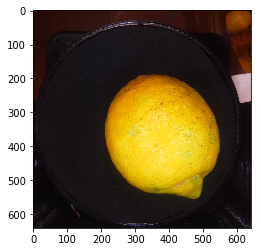

[-12.72838306427002, 12.851189613342285, -8.259571075439453, -15.438264846801758]
样本: ./images/good.jpg,被预测为:1:良


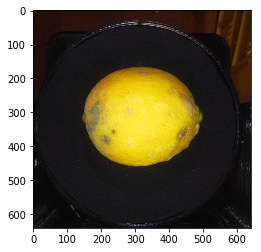

[-15.335797309875488, -1.1803474426269531, 3.300926446914673, 6.7387800216674805]
样本: ./images/bad.jpg,被预测为:3:規格外


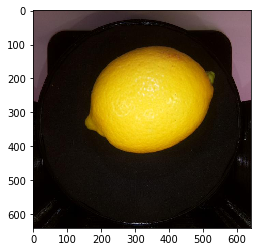

[2.2132835388183594, -12.143485069274902, -19.223731994628906, -6.538657188415527]
样本: ./images/perfect.jpg,被预测为:0:優良


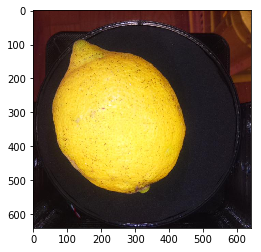

[-19.843774795532227, 0.6211702227592468, 8.250326156616211, 5.142005920410156]
样本: ./images/medium.jpg,被预测为:2:加工品


In [2]:
import os, time
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from paddlelite.lite import *

def load_image(img_path):
    '''
    预测图片预处理
    '''
    img = Image.open(img_path) 
    plt.imshow(img)          #根据数组绘制图像
    plt.show()               #显示图像
    
    if img.mode != 'RGB': 
        img = img.convert('RGB')
        
    img = img.resize((224, 224), Image.BILINEAR)
    img = np.array(img).astype('float32') 
    img = img.transpose((2, 0, 1))  # HWC to CHW 
    img = img / 255                # 像素值归一化 
    
    return img

def infer(img_path):
    config = MobileConfig()
    config.set_model_from_file('./models/model.nb')

    predictor = create_paddle_predictor(config)

    image = load_image(img_path)
    image_data = np.array(image).flatten().tolist()

    input_tensor = predictor.get_input(0)
    input_tensor.resize([1, 3, 224, 224])
    input_tensor.set_float_data(image_data)

    predictor.run()

    output_tensor = predictor.get_output(0)
    
#     print(output_tensor.shape())
    print(output_tensor.float_data()[:4])
    label_list = ['0:優良', '1:良', '2:加工品', '3:規格外']
    lab = np.argmax(output_tensor.numpy())  #argmax():返回最大数的索引
    print("样本: {},被预测为:{}".format(img_path, label_list[lab]))

if __name__ == '__main__':
    image_path = []

    for root, dirs, files in os.walk('./images/'):
        # 遍历work/文件夹内图片
        for f in files:
            image_path.append(os.path.join(root, f))

    for i in range(len(image_path)):
        infer(img_path=image_path[i])
        time.sleep(0.5) #防止输出错乱

# perfect：
Paddle：[ 2.16056728 , -12.18838596, -19.23357201, -6.50627947 ]

Lite：[2.2132835388183594, -12.143485069274902, -19.223731994628906, -6.538657188415527]

# good：
Paddle：[-12.76258850,  12.84745789, -8.19280243 , -15.38843632]

Lite：[-12.72838306427002, 12.851189613342285, -8.259571075439453, -15.438264846801758]

# medium：
Paddle：[-19.89151001,  0.66880405 ,  8.31659508 ,  5.13134909 ]

Lite：[-19.843774795532227, 0.6211702227592468, 8.250326156616211, 5.142005920410156]

# bad：
Paddle：[-15.39087105, -1.13102496 ,  3.33583879 ,  6.73780680 ]

Lite：[-15.335797309875488, -1.1803474426269531, 3.300926446914673, 6.7387800216674805]